# Exercise

1. Load and display the image 'dog.jfif'. Save the image in png format.

In [2]:
import sys
# assert that it is Python version 3.8
assert sys.version_info >=(3,8)

import cv2 as cv
import numpy as np

# check whether opencv is running on optimized code
if not cv.useOptimized():
    cv.setUseOptimized(True)
    
print(f"Is OpenCV running on optimized code? {cv.useOptimized()}")

Is OpenCV running on optimized code? True


In [3]:
img= cv.imread("w3_note/images/dog.jfif")
cv.imshow("dog",img)
k=cv.waitKey(0) & 0xFF
if k== ord('s'):
    cv.imwrite("dog1.jpg",img)
    
cv.destroyAllWindows()

2. Suggest 2 ways and write codes to display 2 images simultaneously. You can use any image snapped from your handphone, downloaded from internet or images from weekly materials on MS teams. The 2 images are original color image and its corresponding grayscale image.

In [ ]:
# method 1
img= cv.imread("w3_note/images/lena.jfif") 
img_grayscale= cv.imread("w3_note/images/lena.jfif",0) 

cv.imshow("color",img)
cv.imshow("grayscale",img_grayscale)

cv.waitKey(0) 
cv.destroyAllWindows()

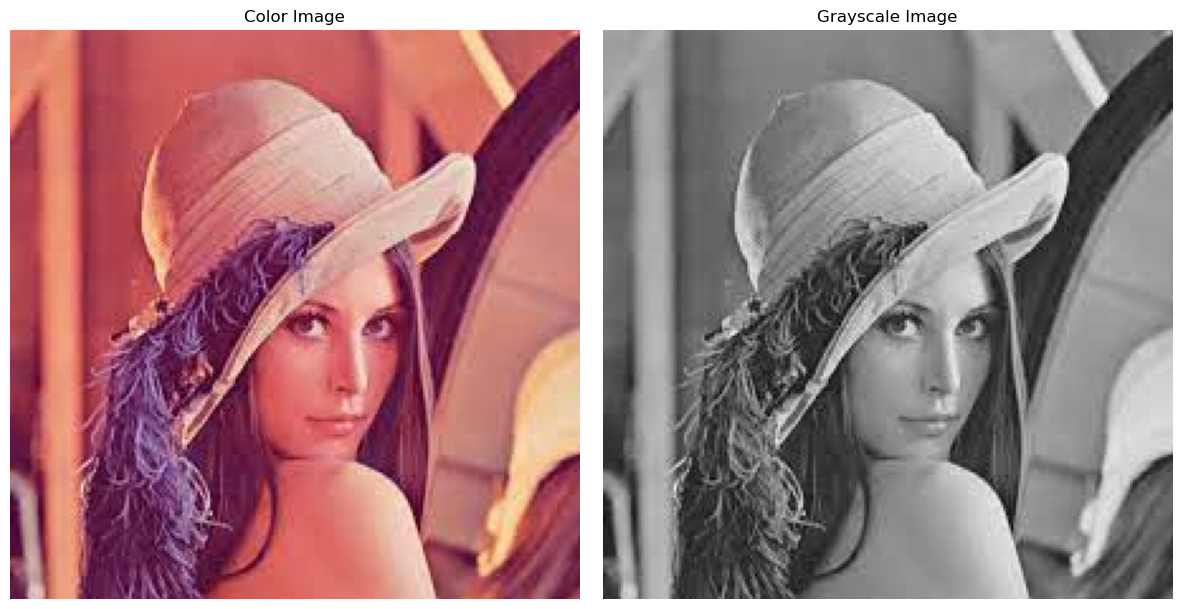

In [2]:
# method 2
import matplotlib.pyplot as plt

# Load images
img = cv.imread("w3_note/images/lena.jfif")  
img_grayscale = cv.imread("w3_note/images/lena.jfif", 0) 

# Convert BGR to RGB for displaying with matplotlib
imgs = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Display images using matplotlib
plt.figure(figsize=(12, 6))

# Original Color Image
plt.subplot(1, 2, 1)
plt.imshow(imgs)
plt.title('Color Image')
plt.axis('off')

# Grayscale Image
plt.subplot(1, 2, 2)
plt.imshow(img_grayscale, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

plt.tight_layout()
plt.show()

3. Write codes that performs the following:
    * Load the video “img_pexels.mp4” into the Python environment, resize it and display the videos with smaller frames (The frames can be of any size, as long as it is smaller). You can specify an arbitrary frame rate.
    * Save it as a separate files: “smaller_img_pexels.avi” or "smaller_img_pexels.mp4"


In [6]:
cap= cv.VideoCapture('w3_note/videos/img_pexels.mp4') #0: webcam, filepath

if not cap.isOpened():
    raise Exception("The video path not present")
    
width= 150
height= 250
fourcc= cv.VideoWriter_fourcc('M','J','P','G')
fps= 15
out=cv.VideoWriter('smaller_img_pexels.avi',fourcc,fps,(width,height))

# read frame with loop
while cap.isOpened():
    ret,frame= cap.read()
    
    if not ret:
        print("Frame not received.")
        break
        
    # Resize the frame to the desired size
    resized_frame = cv.resize(frame, (width, height))
    # save the video
    out.write(resized_frame)
    
    cv.namedWindow("Resized frame",cv.WINDOW_NORMAL)
    cv.imshow("Resized frame",resized_frame)
    
    if cv.waitKey(1) & 0xFF == 27: # Escape keyscroke
        break
        
cap.release()
out.release()
cv.destroyAllWindows()

4. Enlarge the image "dog.jfif" by using different techniques:
    * Linear interpolation
    * Cubic interpolation
    * Nearest neighbor interpolation.
    * Lanczos interpolation
    
Upscale the images by 4 times on its respective dimensions. Perform profiling on each method. Comment on the execution times and quality of resulting images.

In [7]:
import time
from utils import display_images

# Load the image
img = cv.imread('w3_note/images/dog.jfif')

# Define the scaling factor
scale_factor = 4

# Get the dimensions of the original image
height, width = img.shape[:2]

# Calculate new dimensions
new_width = width * scale_factor
new_height = height * scale_factor

# Enlarge the image using different interpolation methods
methods = {
    "Linear": cv.INTER_LINEAR,
    "Cubic": cv.INTER_CUBIC,
    "Nearest": cv.INTER_NEAREST,
    "Lanczos": cv.INTER_LANCZOS4
}

resized_images = []
execution_times = {}

for method_name, method in methods.items():
    start_time = time.time()
    resized_image = cv.resize(img, (new_width, new_height), interpolation=method)
    end_time = time.time()
    execution_times[method_name] = end_time - start_time
    resized_images.append((method_name, resized_image))

# Display the execution times
for method_name, exec_time in execution_times.items():
    print(f"{method_name} interpolation took {exec_time:.6f} seconds")

# Display the original and resized images
display_images([img] + [resized_image for _, resized_image in resized_images],
               ["Original"] + [f"{method_name} Interpolation" for method_name, _ in resized_images])

Linear interpolation took 0.004588 seconds
Cubic interpolation took 0.002995 seconds
Nearest interpolation took 0.000000 seconds
Lanczos interpolation took 0.008269 seconds


Linear Interpolation: This method typically offers a good balance between speed and quality. It smooths the image but might not be as sharp as cubic or Lanczos interpolation.

Cubic Interpolation: This method usually provides better quality than linear interpolation at the cost of slightly more processing time. The resulting image is smoother and retains more detail.

Nearest Neighbor Interpolation: This is the fastest method but produces a lower quality image with noticeable pixelation. It is useful for discrete data rather than continuous data like photographs.

Lanczos Interpolation: This method generally provides the best quality, especially for large scaling factors. However, it is also the slowest due to its complexity.